# Titanic - Machine Learning Project (UT)
---

In [53]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
!pip install -q plotnine
from plotnine import *

---

## Plan

1) **Input Data** - for importing our train and test data set.

2) **Data Exploration** - for exploring our train data set 

3) **Feature Engineering** - for merging and removing columns

4) **Data Processing** - preparing data for model fitting

5) **Building Models:**

    1. Logistic Regression

    2. Random Forest Classifier

    3. KNN Classifier

    4. SVC

    5. XGBClassifier

    6. Neural Network
6) **Ensemble Learning** - Soft voting for final 

7) **Performance metrics** - for advanced measurement
---

### Input Data

In [54]:
os.listdir('inputs/')

['test.csv', 'train.csv', 'submission_sample.csv']

In [55]:
train_df = pd.read_csv("./inputs/train.csv")
test_df = pd.read_csv("./inputs/test.csv")

In [56]:
data_list = [train_df, test_df]

In [57]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


---

### Data Exploration

In [60]:
print(f"Train data is {train_df.shape[0]} rows, with {train_df.shape[1]} columns")
print(f"Test data is {test_df.shape[0]} rows, with {test_df.shape[1]} columns")

Train data is 891 rows, with 12 columns
Test data is 418 rows, with 11 columns


In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [63]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
numeric_columns = train_df[['Age','SibSp','Parch','Fare']]
categorical_columns = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

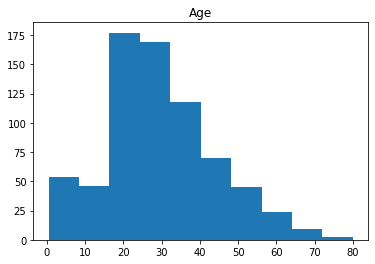

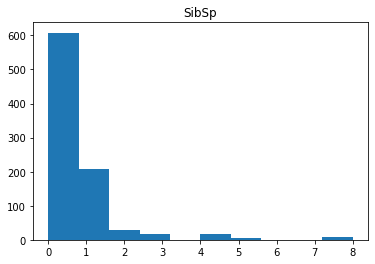

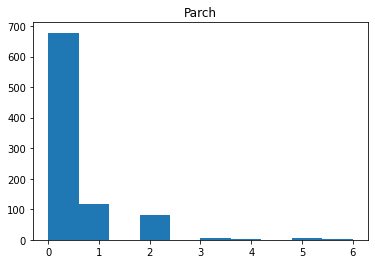

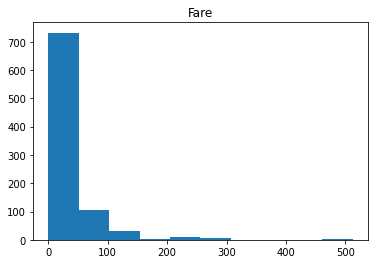

In [65]:
for i in numeric_columns.columns:
    plt.hist(numeric_columns[i])
    plt.title(i)
    plt.show()

In [66]:
pd.pivot_table(train_df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [67]:
pd.pivot_table(train_df, index = 'Survived', columns = 'Pclass', values = 'PassengerId' ,aggfunc ='count')


Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [68]:
pd.pivot_table(train_df, index = 'Survived', columns = 'Sex', values = 'PassengerId' ,aggfunc ='count')


Sex,female,male
Survived,,
0,81,468
1,233,109


In [69]:
pd.pivot_table(train_df, index = 'Survived', columns = 'Embarked', values = 'PassengerId' ,aggfunc ='count')


Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [70]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:>

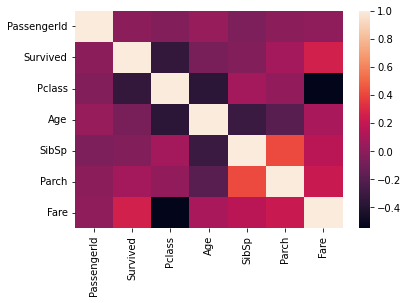

In [71]:
sns.heatmap(train_df.corr())

In [72]:
for place in train_df['Embarked'].unique()[0:3]:
    place_count = len(train_df[(train_df.Embarked == place)])
    a = len(train_df)
    print(f"Number of people from {place} are {place_count*100/a}%")

Number of people from S are 72.27833894500561%
Number of people from C are 18.855218855218855%
Number of people from Q are 8.641975308641975%


### Feature Engineering
---

In [73]:
# Merging Parent Children and Sibling Spouse to FamilyOnBoard
train_df['FamilyOnBoard']= train_df.SibSp + train_df.Parch
test_df['FamilyOnBoard']= test_df.SibSp + test_df.Parch

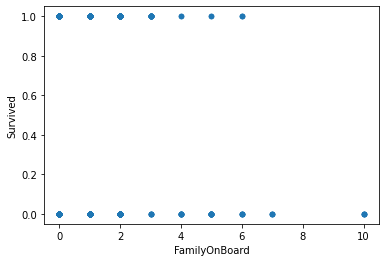

In [74]:
plot = train_df.plot.scatter('FamilyOnBoard','Survived')

In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  FamilyOnBoard  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [76]:
train_df['cabin_adv'] = train_df.Cabin.apply(lambda x: str(x)[0])
test_df['cabin_adv'] = test_df.Cabin.apply(lambda x: str(x)[0])

In [77]:
pd.pivot_table(train_df,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


### Data Processing

---


In [78]:
train_df = train_df.drop(labels='Parch', axis=1)
test_df = test_df.drop(labels='Parch', axis=1)

train_df = train_df.drop(labels='SibSp', axis=1)
test_df = test_df.drop(labels='SibSp', axis=1)

In [79]:
def fill_empty_Median(dataFrame, column, groupColumns ):
    dataFrame[column] = dataFrame[column].fillna(dataFrame.groupby(groupColumns)[column].transform('median'))
    return dataFrame[column]

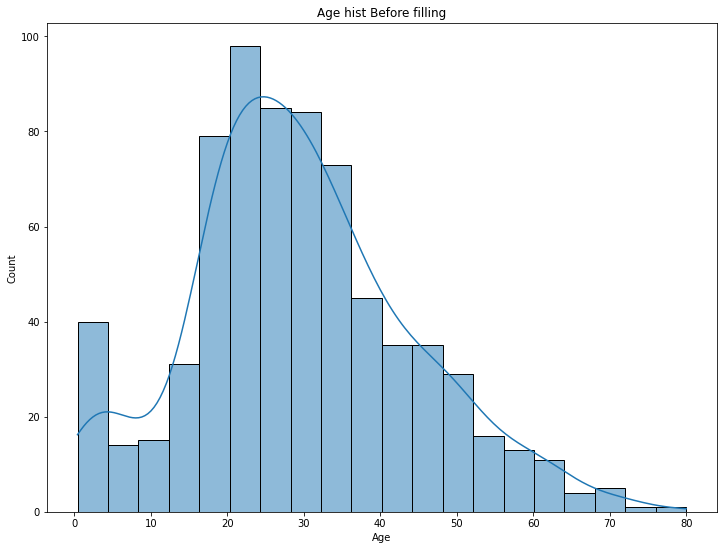

In [80]:
fig = plt.figure(figsize = (12,9))
sns.histplot(train_df["Age"], kde=True, palette='BuPu_r')
plt.title('Age hist Before filling')
plt.show()

In [81]:
train_df['Age'] = fill_empty_Median(train_df, "Age", ['FamilyOnBoard', 'Sex', 'Pclass', 'Fare'])
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

test_df['Age'] = fill_empty_Median(test_df, "Age", ['FamilyOnBoard', 'Sex', 'Pclass', 'Fare'])
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   Ticket         891 non-null    object 
 7   Fare           891 non-null    float64
 8   Cabin          204 non-null    object 
 9   Embarked       889 non-null    object 
 10  FamilyOnBoard  891 non-null    int64  
 11  cabin_adv      891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


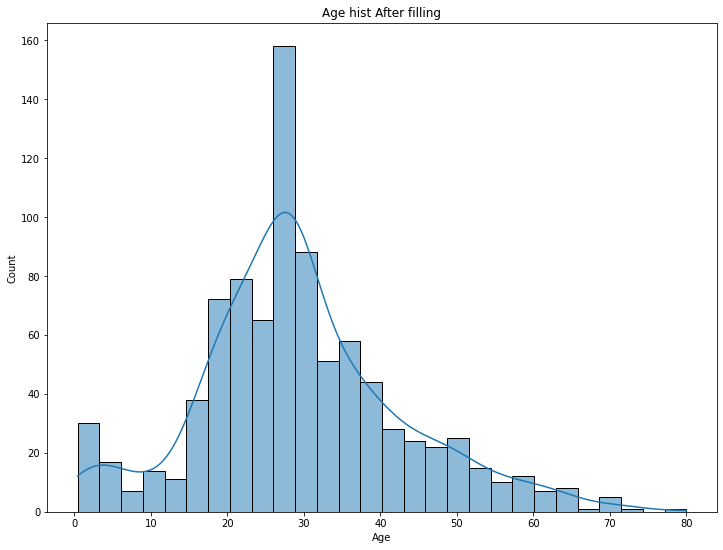

In [83]:
fig = plt.figure(figsize = (12,9))
sns.histplot(train_df["Age"], kde=True, palette='BuPu_r')
plt.title('Age hist After filling')
plt.show()

In [84]:
train_df = train_df.drop(labels='Cabin', axis=1)
test_df = test_df.drop(labels='Cabin', axis=1)

In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   Ticket         891 non-null    object 
 7   Fare           891 non-null    float64
 8   Embarked       889 non-null    object 
 9   FamilyOnBoard  891 non-null    int64  
 10  cabin_adv      891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [86]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Name           418 non-null    object 
 3   Sex            418 non-null    object 
 4   Age            418 non-null    float64
 5   Ticket         418 non-null    object 
 6   Fare           417 non-null    float64
 7   Embarked       418 non-null    object 
 8   FamilyOnBoard  418 non-null    int64  
 9   cabin_adv      418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [87]:
test_df.Fare = test_df.Fare.fillna(train_df.Fare.median())

### Building Models

---

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [89]:
features = ['Pclass', "Sex", 'Age', "Fare", "Embarked", "FamilyOnBoard", 'cabin_adv', 'Survived']

#split valid train set into train and validation parts
train_df = pd.get_dummies(train_df[features])

train_df, train_df_val = train_test_split(train_df, random_state = 111, test_size = 0.20)

y = train_df["Survived"]
x = train_df.drop(columns=['Survived'])

y_val = train_df_val["Survived"]
x_val = train_df_val.drop(columns=['Survived'])

features.remove("Survived")

test_x = pd.get_dummies(test_df[features])
test_x.insert(16, 'cabin_adv_T' ,418*[0]) # Solution for (X has 17 features, but LogisticRegression is expecting 18 features as input)

In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 167 to 852
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         712 non-null    int64  
 1   Age            712 non-null    float64
 2   Fare           712 non-null    float64
 3   FamilyOnBoard  712 non-null    int64  
 4   Survived       712 non-null    int64  
 5   Sex_female     712 non-null    uint8  
 6   Sex_male       712 non-null    uint8  
 7   Embarked_C     712 non-null    uint8  
 8   Embarked_Q     712 non-null    uint8  
 9   Embarked_S     712 non-null    uint8  
 10  cabin_adv_A    712 non-null    uint8  
 11  cabin_adv_B    712 non-null    uint8  
 12  cabin_adv_C    712 non-null    uint8  
 13  cabin_adv_D    712 non-null    uint8  
 14  cabin_adv_E    712 non-null    uint8  
 15  cabin_adv_F    712 non-null    uint8  
 16  cabin_adv_G    712 non-null    uint8  
 17  cabin_adv_T    712 non-null    uint8  
 18  cabin_ad

In [91]:
train_df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 374 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         179 non-null    int64  
 1   Age            179 non-null    float64
 2   Fare           179 non-null    float64
 3   FamilyOnBoard  179 non-null    int64  
 4   Survived       179 non-null    int64  
 5   Sex_female     179 non-null    uint8  
 6   Sex_male       179 non-null    uint8  
 7   Embarked_C     179 non-null    uint8  
 8   Embarked_Q     179 non-null    uint8  
 9   Embarked_S     179 non-null    uint8  
 10  cabin_adv_A    179 non-null    uint8  
 11  cabin_adv_B    179 non-null    uint8  
 12  cabin_adv_C    179 non-null    uint8  
 13  cabin_adv_D    179 non-null    uint8  
 14  cabin_adv_E    179 non-null    uint8  
 15  cabin_adv_F    179 non-null    uint8  
 16  cabin_adv_G    179 non-null    uint8  
 17  cabin_adv_T    179 non-null    uint8  
 18  cabin_ad

In [92]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr,x,y,cv=5)

print('-'*40)
for val in enumerate(cv):
    print(f"Accuracy #{val[0]}: {val[1]} ")

print('-'*40)
print(f"Mean value: {cv.mean()}")
x.info()

----------------------------------------
Accuracy #0: 0.7762237762237763 
Accuracy #1: 0.7272727272727273 
Accuracy #2: 0.852112676056338 
Accuracy #3: 0.7676056338028169 
Accuracy #4: 0.8309859154929577 
----------------------------------------
Mean value: 0.7908401457697233
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 167 to 852
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         712 non-null    int64  
 1   Age            712 non-null    float64
 2   Fare           712 non-null    float64
 3   FamilyOnBoard  712 non-null    int64  
 4   Sex_female     712 non-null    uint8  
 5   Sex_male       712 non-null    uint8  
 6   Embarked_C     712 non-null    uint8  
 7   Embarked_Q     712 non-null    uint8  
 8   Embarked_S     712 non-null    uint8  
 9   cabin_adv_A    712 non-null    uint8  
 10  cabin_adv_B    712 non-null    uint8  
 11  cabin_adv_C    712 non-null    uint8  


In [93]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,x,y,cv=5)

print('-'*40)
for val in enumerate(cv):
    print(f"Accuracy #{val[0]}: {val[1]} ")

print('-'*40)
print(f"Mean value: {cv.mean()}")

----------------------------------------
Accuracy #0: 0.7272727272727273 
Accuracy #1: 0.7062937062937062 
Accuracy #2: 0.7535211267605634 
Accuracy #3: 0.6830985915492958 
Accuracy #4: 0.7253521126760564 
----------------------------------------
Mean value: 0.7191076529104697


In [94]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)

cv = cross_val_score(rfc, x, y, cv=5)

print('-'*40)
for val in enumerate(cv):
    print(f"Accuracy #{val[0]}: {val[1]} ")

print('-'*40)
print(f"Mean value: {cv.mean()}")

----------------------------------------
Accuracy #0: 0.8111888111888111 
Accuracy #1: 0.7902097902097902 
Accuracy #2: 0.8309859154929577 
Accuracy #3: 0.7605633802816901 
Accuracy #4: 0.8098591549295775 
----------------------------------------
Mean value: 0.8005614104205652


In [95]:
svc = SVC(probability = True)
cv = cross_val_score(svc,x,y,cv=5)

print('-'*40)
for val in enumerate(cv):
    print(f"Accuracy #{val[0]}: {val[1]} ")

print('-'*40)
print(f"Mean value: {cv.mean()}")

----------------------------------------
Accuracy #0: 0.6643356643356644 
Accuracy #1: 0.6643356643356644 
Accuracy #2: 0.676056338028169 
Accuracy #3: 0.704225352112676 
Accuracy #4: 0.6830985915492958 
----------------------------------------
Mean value: 0.6784103220722939


In [96]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,x,y,cv=5)

print('-'*40)
for val in enumerate(cv):
    print(f"Accuracy #{val[0]}: {val[1]} ")

print('-'*40)
print(f"Mean value: {cv.mean()}")

[01:32:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

#### Custom Neural Network

---


In [97]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
n_features = x.columns.size
model.add(Dense(n_features, activation='relu', input_shape=(n_features,)))

model.add(Dense(n_features, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

#model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model._estimator_type = "classifier"

In [98]:
model.fit(x, y, epochs=50, batch_size=4, verbose=1)

Epoch 1/50
178/178 [==============================] - 0s 1ms/step - loss: 0.7625 - accuracy: 0.6390
Epoch 2/50
178/178 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.6517
Epoch 3/50
178/178 [==============================] - 0s 915us/step - loss: 0.5950 - accuracy: 0.6910
Epoch 4/50
178/178 [==============================] - 0s 933us/step - loss: 0.5321 - accuracy: 0.7542
Epoch 5/50
178/178 [==============================] - 0s 958us/step - loss: 0.4917 - accuracy: 0.7809
Epoch 6/50
178/178 [==============================] - 0s 972us/step - loss: 0.5007 - accuracy: 0.7837
Epoch 7/50
178/178 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7781
Epoch 8/50
178/178 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.7711
Epoch 9/50
178/178 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.7823
Epoch 10/50
178/178 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy

In [99]:
print(model.evaluate(x, y))

23/23 [==============================] - 0s 712us/step - loss: 0.4068 - accuracy: 0.8062
[0.40676751732826233, 0.8061797618865967]


#### Ensemble Learning

---



In [100]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = 
                              [
                                  ('lr', lr),
                                  ('knn',knn),
                                  ('svc',svc),
                                  ('xgb',xgb),
                                  ], voting = 'soft') 

cv = cross_val_score(voting_clf,x,y,cv=5)

print('-'*40)
for val in enumerate(cv):
    print(f"Accuracy #{val[0]}: {val[1]} ")

print('-'*40)
print(f"Mean value: {cv.mean()}")

[01:32:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [101]:
voting_clf.fit(x, y)

[01:32:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=2000)),
                             ('knn', KNeighborsClassifier()),
                             ('svc', SVC(probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, 

In [102]:
def results_to_submit(model, test_x, file_name):
    model.fit(x,y)
    results =  model.predict(test_x).astype(int)
    final_data = {'PassengerId': test_df.PassengerId, 'Survived': results}
    submission = pd.DataFrame(data=final_data)
    submission.to_csv(f'./outputs/{file_name}.csv', index=False)

In [103]:
results_to_submit(voting_clf, test_x, 'submission_ensemble' )
results_to_submit(lr, test_x, 'submission_lr' )
results_to_submit(knn, test_x, 'submission_knn' )
results_to_submit(svc, test_x, 'submission_svc' )
results_to_submit(xgb, test_x, 'submission_xgb' )
results_to_submit(rfc, test_x, 'submission_rf' )

[01:32:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [104]:
model.fit(x,y)
predictions =  model.predict(test_x)
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1
predictions

submission = pd.read_csv('./inputs/submission_sample.csv')
submission['Survived'] = predictions
submission.to_csv('./outputs/submission_neural.csv', index=False)

23/23 [==============================] - 0s 1ms/step - loss: 0.3993 - accuracy: 0.8188


---

### Performance metrics

---


In [105]:
def generate_coordinates(scores, classes, verbose = True):
  # thresholds can be obtained from scores
  thresholds = np.unique(scores)
  # initialise roc_coordinates
  roc_coordinates = pd.DataFrame(columns=['FPR','TPR'], index=thresholds)

  for threshold in thresholds:
    if (verbose == True):
      print(f'For threshold {threshold}')
    
    predictions = scores >= threshold
    predictions[predictions == True] = 1
    predictions[predictions == False] = 0
    pred_positive = classes[predictions == 1].to_numpy().flatten()
    pred_negative = classes[predictions == 0].to_numpy().flatten()
    
    tp = np.sum(pred_positive == 1)
    fn = np.sum(pred_negative == 1)
    tn = np.sum(pred_negative == 0)
    fp = np.sum(pred_positive == 0)
    
    if (verbose == True):
      print(f'tp = {tp}, fn = {fn}, tn = {tn}, fp = {fp}')
    
    tpr = tp/(tp + fn) # the same as recall
    fpr = fp/(fp + tn)
    
    if (verbose == True):
      print(f'FPR = {np.round(fpr, 2)}, TPR = {np.round(tpr, 2)}\n')
    roc_coordinates.loc[threshold] = pd.Series({'FPR':np.round(fpr,2), 'TPR':np.round(tpr,2)})

  return roc_coordinates

In [106]:
def plot_roc(coordinates_dict):
  """
  plot_roc function plots all models' ROCs on one plot
  """
  plotting_data = pd.DataFrame(columns=['FPR', 'TPR', 'Method'])

  for id, name in enumerate(coordinates_dict.keys()):
    method_data = coordinates_dict[name]
    method_data['Method'] = name
    plotting_data = pd.concat([plotting_data, method_data])
  
  plotting_data['Method'] = pd.Categorical(plotting_data['Method'])
  
  # To those of you who are interested in what the hell is going on
  # check the comments for each line:
  roc_plot = (
        ggplot(data = plotting_data, # creates a canvas
        mapping = aes(x = 'FPR', y = 'TPR', colour = 'Method')) + # specifies dimensions
        geom_path(size = 4) + # determines geometric primitive to be visualised (path/line in our case) and its thickness 
        labs(title ='', x = 'FPR', y = 'TPR') + # labels of the x and y axes
        # this is all for the figure, beloow are only formatting specs
        theme_bw() + # colour schema 
        theme(figure_size = (50, 50), # figure size
              axis_line = element_line(size = 1.5, colour = "black"), 
              panel_grid_major = element_line(size = 0.05, colour = "black"),
              panel_grid_minor = element_line(size = 0.05, colour = "black"),
              axis_text = element_text(size = 70, colour ='black')) # more formatting details 
      )
  return roc_plot

In [107]:
from sklearn.metrics import classification_report
def show_metrics(model_list, real_survival_result):
  for model_key in model_list:
    print('-'*40)
    prediction_in_use = model_list[model_key]
    print(f"Classification report for #{model_key}:")
    print(classification_report(real_survival_result, prediction_in_use))
    print('-'*40)

In [108]:
#Fit all models here
rfc.fit(x,y)
knn.fit(x,y)
lr.fit(x,y)
svc.fit(x,y)
xgb.fit(x,y)
model.fit(x,y)
voting_clf.fit(x,y)

#Predict all models here
rfc_prediction = rfc.predict(x_val)
knn_prediction = knn.predict(x_val)
lr_prediction = lr.predict(x_val)
svc_prediction = svc.predict(x_val)
xgb_prediction = xgb.predict(x_val)
model_prediction = model.predict(x_val)
voting_clf_prediction = voting_clf.predict(x_val)

#Prepare list of models with predictions
all_models_predictions = {'RandomForest':rfc_prediction, 
              'KNN':knn_prediction,
              'LinearRegression':lr_prediction,
              'SVC':svc_prediction,
              'XGB':xgb_prediction,
              'Voting':voting_clf_prediction
              }


show_metrics(all_models_predictions, y_val) 

[01:32:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
23/23 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8216
[01:32:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
----------------------------------------
Classification report for #RandomForest:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       113
           1       0.81      0.65      0.72        66

    accuracy                           0.82       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.82      0.82      0.81       179



In [109]:
def generate_roc_coordinates(model_dict, data_X , data_Y):
  #case of survival
  positive_class = 1
  val = pd.DataFrame()
  all_roc_coordinates = {}
  for model_key in model_dict:
    print('-'*40)
    print(f"Calculationg prediction probabilities for #{model_key}:")
    model_in_use = model_dict[model_key] 
    val[model_key] = model_in_use.predict_proba(data_X)[:,positive_class]
    print('-'*40)

  for model_key in model_dict:
    # passing each model's prediction probability and real survival value to function
    # to generate roc_coordinate and put it in dictionary
    print('-'*40)
    print(f"Generating ROC coordinates for #{model_key}:")
    all_roc_coordinates[model_key] = generate_coordinates(val[model_key].values,data_Y , verbose=False)
    print('-'*40)

  for model_key in model_dict:
    res = np.round(metrics.roc_auc_score(data_Y,val[model_key]),3)
    print(f"AUC of {model_key} classifier is {res}")

  top_row =  pd.DataFrame({'FPR':0, 'TPR':0}, index=[1.0])
  final_roc_coordinates = {}
  for model_key in model_dict:
    final_roc_coordinates[model_key] = pd.concat([top_row, all_roc_coordinates[model_key]]).astype('float')

  return final_roc_coordinates

----------------------------------------
Calculationg prediction probabilities for #RandomForest:
----------------------------------------
----------------------------------------
Calculationg prediction probabilities for #KNN:
----------------------------------------
----------------------------------------
Calculationg prediction probabilities for #LinearRegression:
----------------------------------------
----------------------------------------
Calculationg prediction probabilities for #SVC:
----------------------------------------
----------------------------------------
Calculationg prediction probabilities for #XGB:
----------------------------------------
----------------------------------------
Generating ROC coordinates for #RandomForest:
----------------------------------------
----------------------------------------
Generating ROC coordinates for #KNN:
----------------------------------------
----------------------------------------
Generating ROC coordinates for #LinearRe

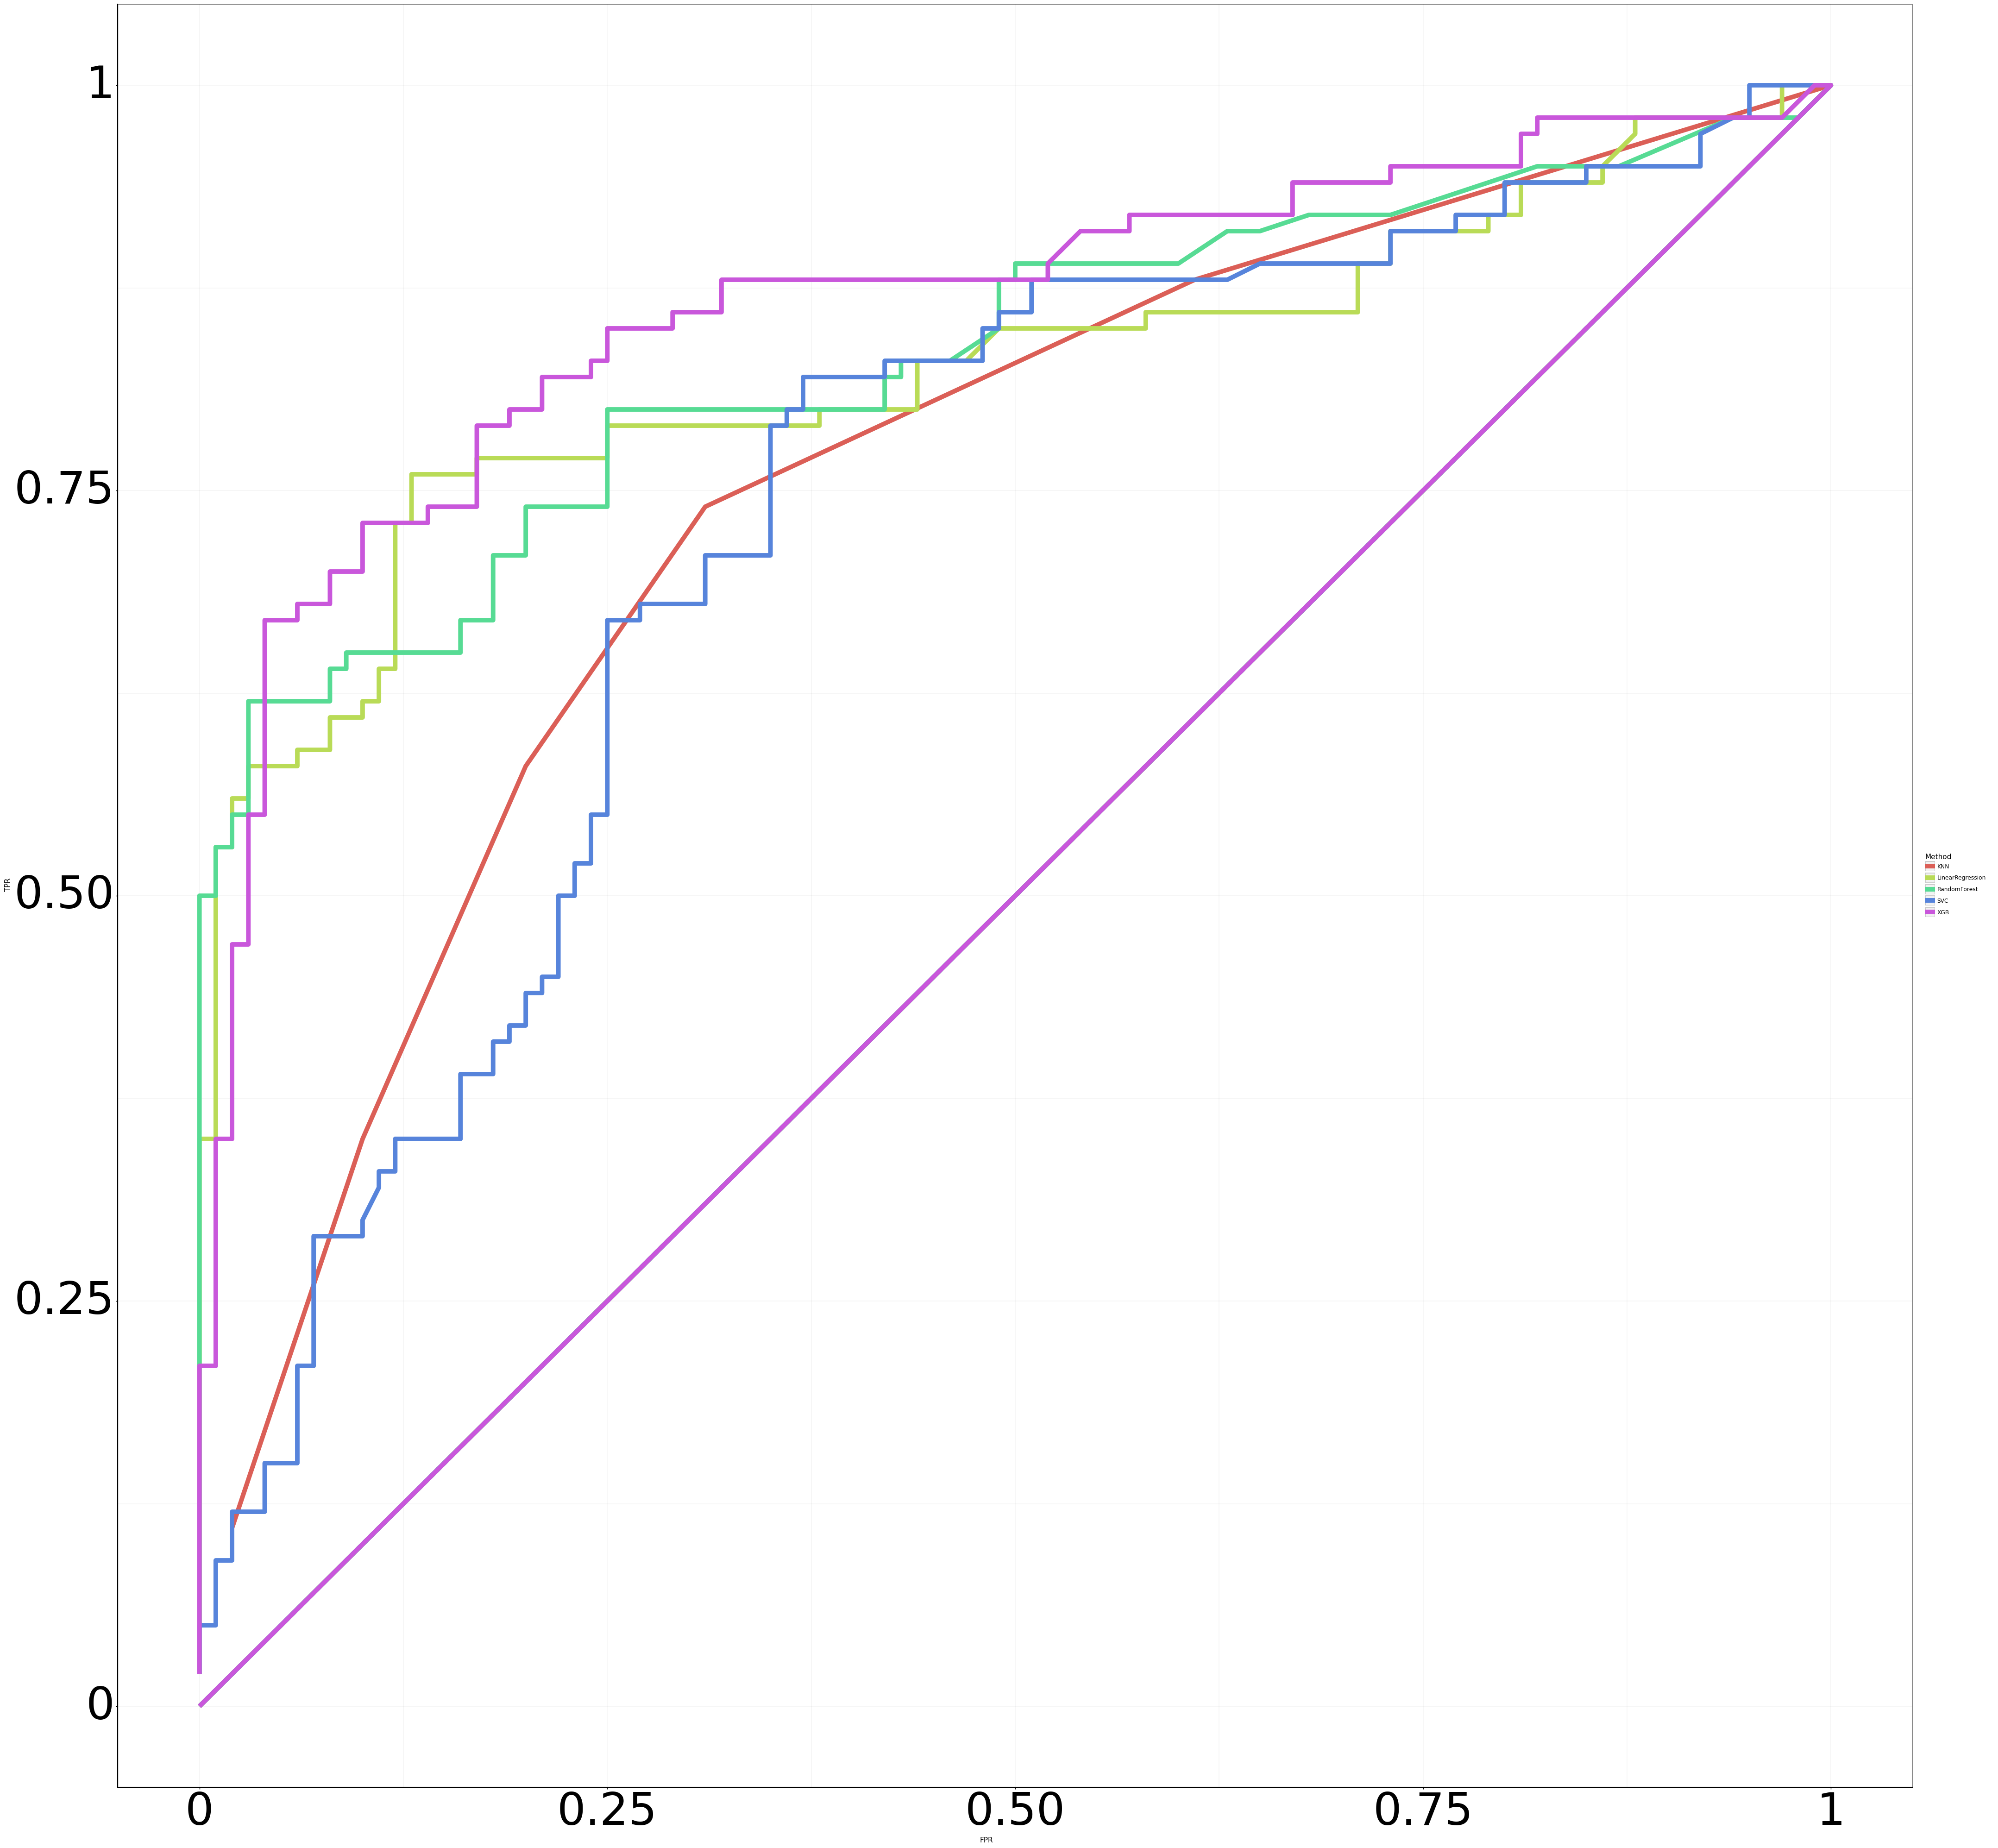

<ggplot: (8784309687884)>

In [110]:
all_models = {'RandomForest':rfc, 
              'KNN':knn,
              'LinearRegression':lr,
              'SVC':svc,
              'XGB':xgb
              }
final_roc = generate_roc_coordinates(all_models, x_val, y_val)
plot_roc(dict(final_roc))